# RandomForest4

## Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.tree import plot_tree

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Bio/data_preprasi_AMPK.csv")
df.head(5)

,MW,LogP,NumHDonors,NumHAcceptors,pIC50,class_numeric,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,NumHDonors.1,NumHAcceptors.1
0,398.482,3.33494,3,3,7.207608,0,1,1,1,0,...,0,0,0,0,0,0,0,0,3,3
1,484.431,6.54092,2,6,6.000000,0,1,1,1,0,...,0,0,0,0,0,0,0,0,2,6
2,386.858,4.77030,1,5,5.000000,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,5
3,502.978,2.79240,2,8,5.000000,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2,8
4,486.979,3.55440,2,7,5.000000,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2,7


In [ ]:
print("Shape Data:")
df.shape

Shape Data:


(174, 889)

In [ ]:
# Menampilkan jumlah klasifikasi pada kolom 'class_numeric' Active : 0 & Inactive: 1
classification_counts = df['class_numeric'].value_counts()
print("Count Classification On Column 'class_numeric':")
print(classification_counts)

Count Classification On Column 'class_numeric':
class_numeric
1    141
0     33
Name: count, dtype: int64


## EDA

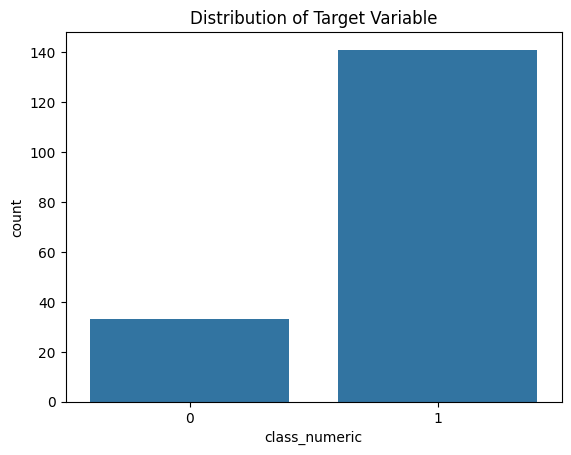

In [ ]:
# EDA: Visualizing the distribution of the target variable
sns.countplot(x='class_numeric', data=df)
plt.title('Distribution of Target Variable')
plt.show()

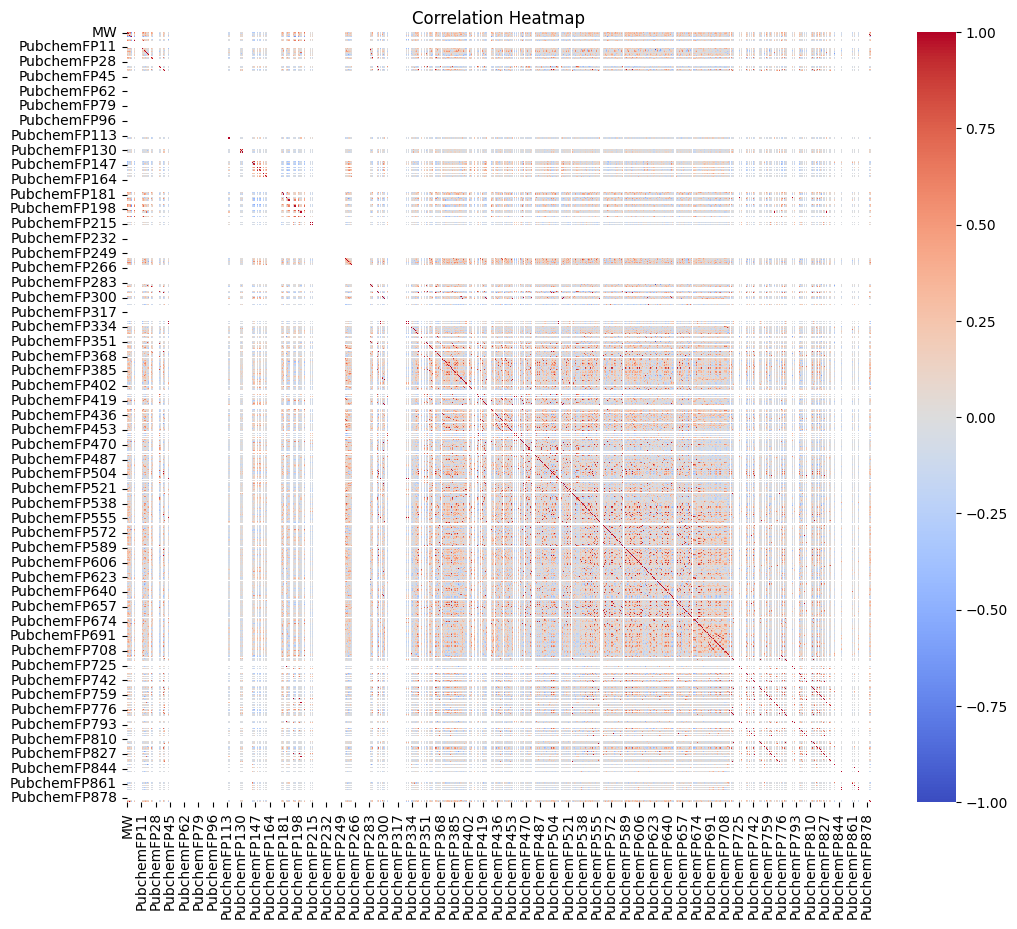

In [ ]:
# EDA: Correlation heatmap of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Model

In [ ]:
# Feature selection (drop the target column `class_numeric` from features)
X = df.drop(columns=['class_numeric'])
y = df['class_numeric']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139, 888), (35, 888), (139,), (35,))

In [ ]:
# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluasi

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 94.29%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.94      1.00      0.97        30

    accuracy                           0.94        35
   macro avg       0.97      0.80      0.86        35
weighted avg       0.95      0.94      0.94        35



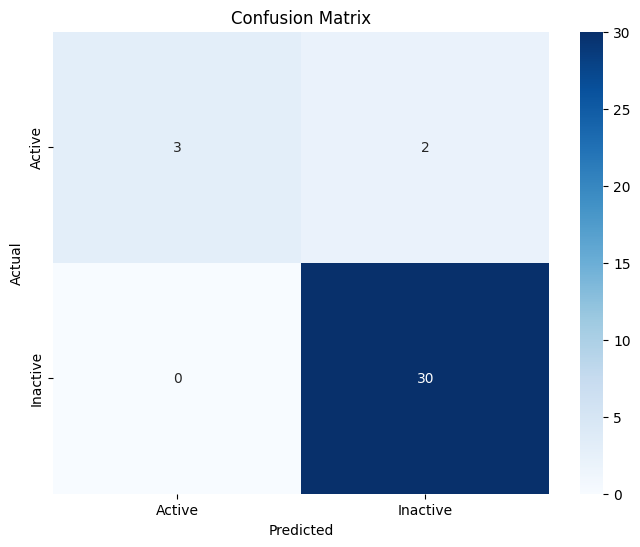

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Active', 'Inactive'], yticklabels=['Active', 'Inactive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

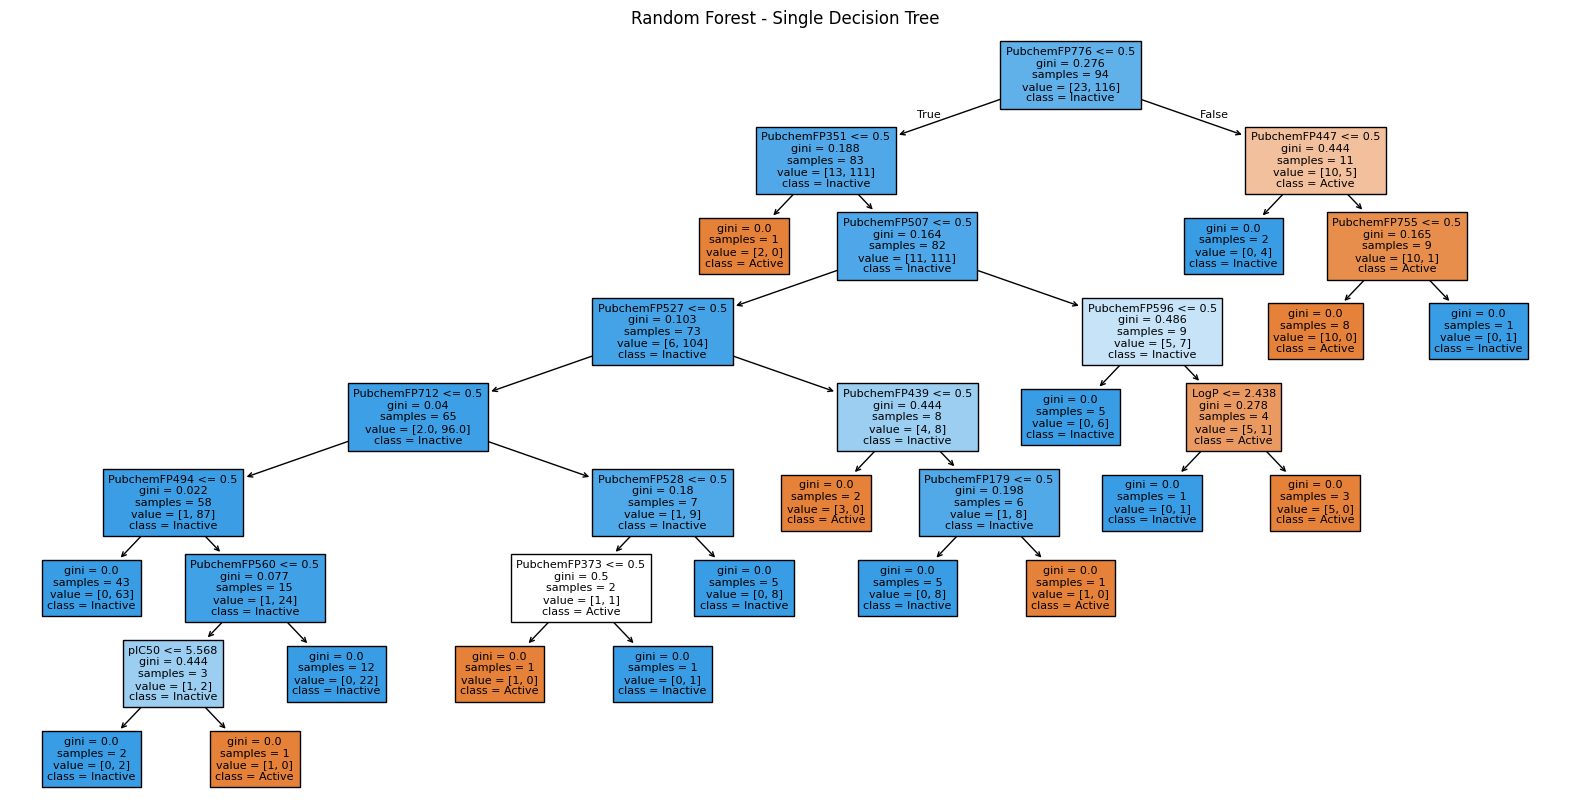

In [ ]:
# Plotting a tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=['Active', 'Inactive'], filled=True, fontsize=8)
plt.title('Random Forest - Single Decision Tree')
plt.show()

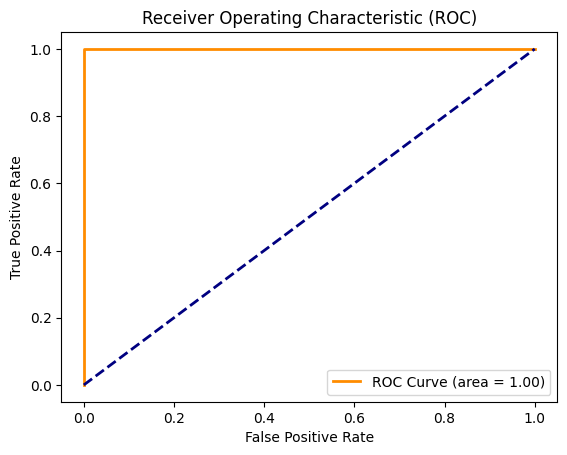

In [ ]:
# ROC Curve and AUC
if len(np.unique(y)) == 2:  # Ensure binary classification
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# RandomForest5


## Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Bio/data_preprasi_AMPK.csv')
df.head()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50,class_numeric,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,NumHDonors.1,NumHAcceptors.1
0,398.482,3.33494,3,3,7.207608,0,1,1,1,0,...,0,0,0,0,0,0,0,0,3,3
1,484.431,6.54092,2,6,6.000000,0,1,1,1,0,...,0,0,0,0,0,0,0,0,2,6
2,386.858,4.77030,1,5,5.000000,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,5
3,502.978,2.79240,2,8,5.000000,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2,8
4,486.979,3.55440,2,7,5.000000,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2,7



Target Distribution:

class_numeric
1    141
0     33
Name: count, dtype: int64


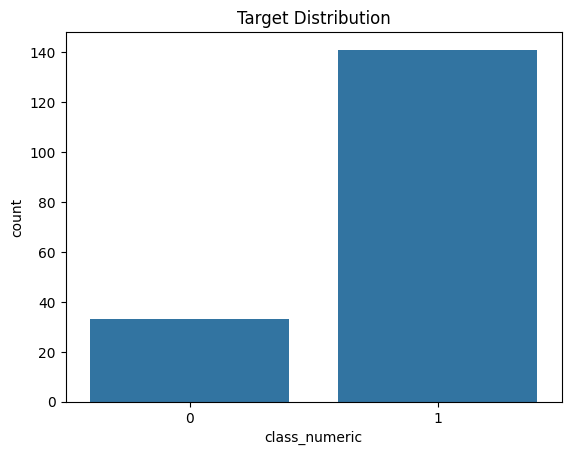

In [ ]:
# Target Distribution
print("\nTarget Distribution:\n")
print(df['class_numeric'].value_counts())
sns.countplot(x='class_numeric', data=df)
plt.title("Target Distribution")
plt.show()

## Model

In [ ]:
# Split dataset
X = df.drop(columns=['class_numeric'])
y = df['class_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139, 888), (35, 888), (139,), (35,))

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluasi

In [ ]:
# Classification Report
y_pred = rf_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.94      1.00      0.97        30

    accuracy                           0.94        35
   macro avg       0.97      0.80      0.86        35
weighted avg       0.95      0.94      0.94        35



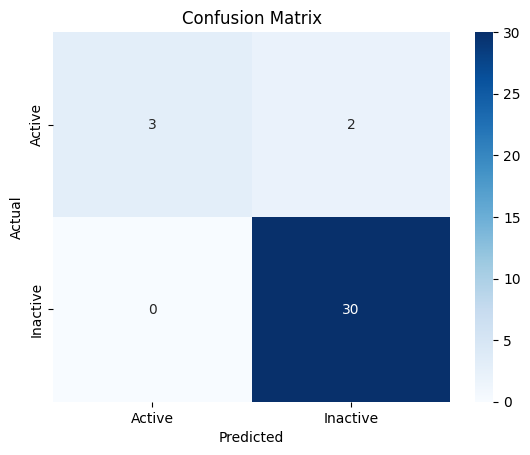

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Active', 'Inactive'], yticklabels=['Active', 'Inactive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

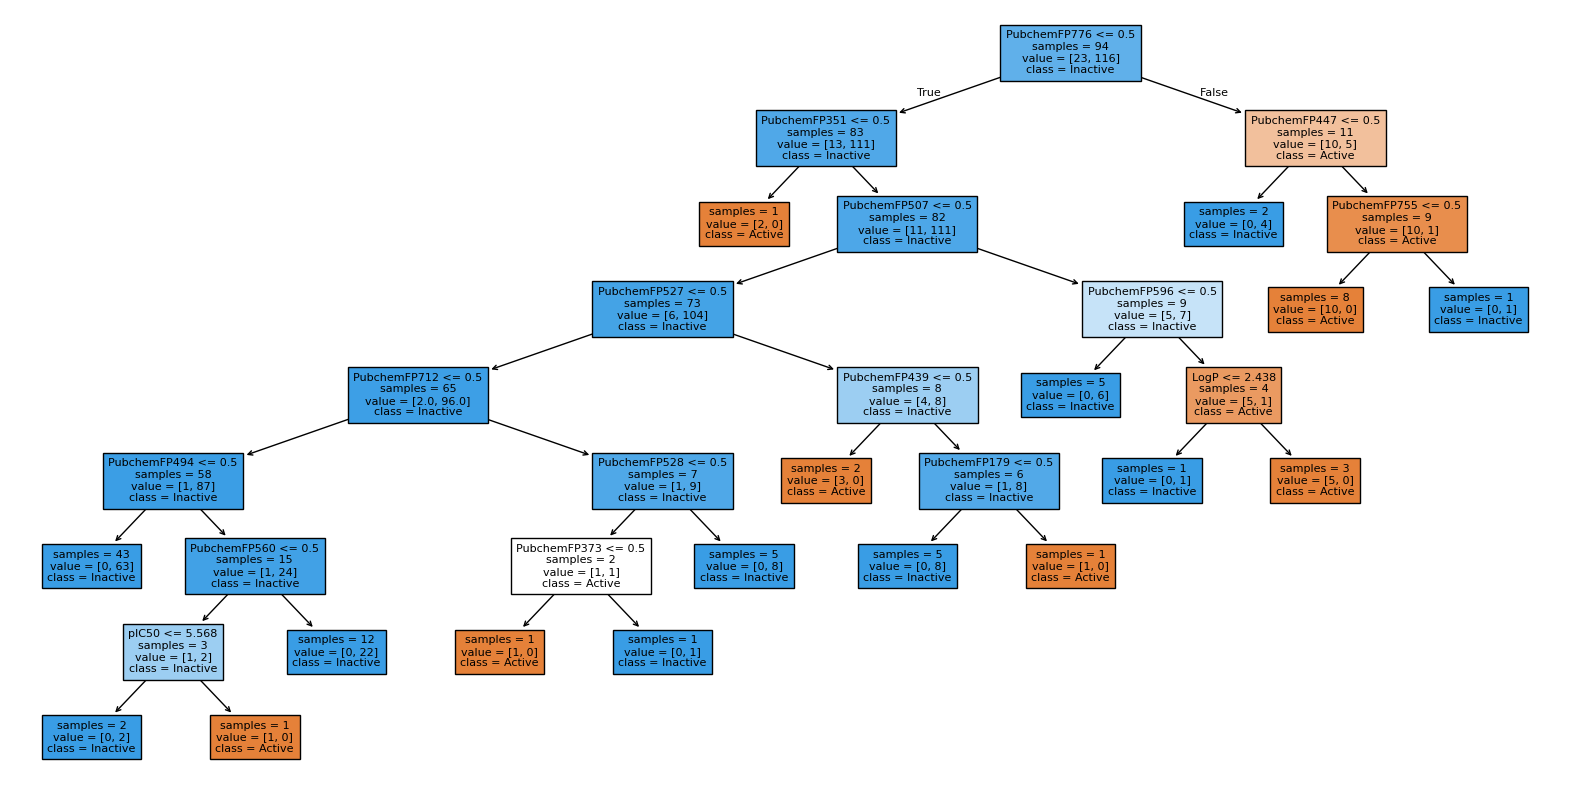

In [ ]:
# Visualize a Decision Tree
# print("\nDecision Tree Example:\n")
# print(export_text(rf_model.estimators_[0], feature_names=list(X.columns)))
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=['Active', 'Inactive'], filled=True, impurity=False, fontsize=8)
plt.show()

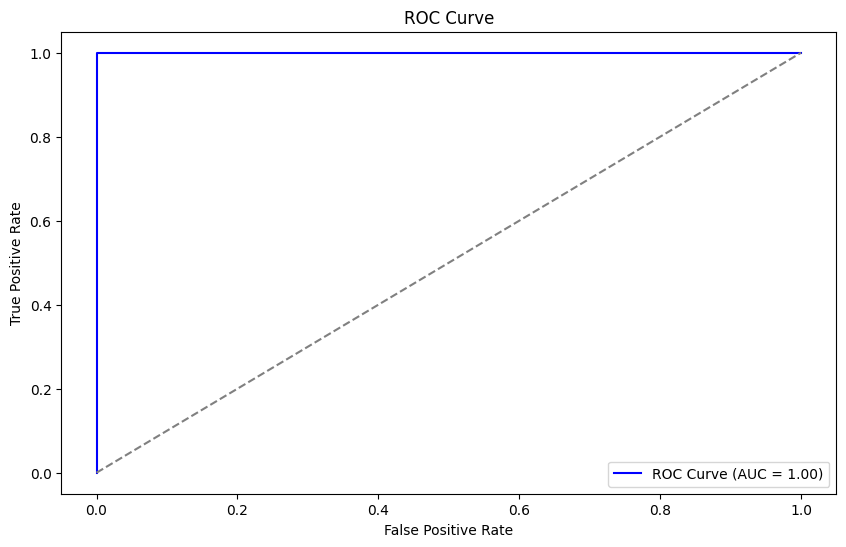

In [ ]:
# ROC and AUC Curve
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Predict

In [ ]:

# Prediction Function
def predict_molecule(input_data):
    """Predict the class of a molecule (Active or Inactive)."""
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = rf_model.predict(input_df)
    probability = rf_model.predict_proba(input_df)
    class_map = {0: 'Active', 1: 'Inactive'}
    return {
        'Prediction': class_map[prediction[0]],
        'Probability': {
            'Active': probability[0][0],
            'Inactive': probability[0][1]
        },
        'Input Data': input_data
    }

In [ ]:
# Example Prediction
example_molecule = X.iloc[0].to_dict()  # Replace with your custom input data
result = predict_molecule(example_molecule)
print("Example Prediction:\n")
print("Prediction:", result['Prediction'])
print("Probability:", result['Probability'])
print("Input Data:", result['Input Data'])

Example Prediction:

Prediction: Active
Probability: {'Active': 0.76, 'Inactive': 0.24}
Input Data: {'MW': 398.48200000000014, 'LogP': 3.3349400000000013, 'NumHDonors': 3.0, 'NumHAcceptors': 3.0, 'pIC50': 7.207608310501746, 'PubchemFP0': 1.0, 'PubchemFP1': 1.0, 'PubchemFP2': 1.0, 'PubchemFP3': 0.0, 'PubchemFP4': 0.0, 'PubchemFP5': 0.0, 'PubchemFP6': 0.0, 'PubchemFP7': 0.0, 'PubchemFP8': 0.0, 'PubchemFP9': 1.0, 'PubchemFP10': 1.0, 'PubchemFP11': 1.0, 'PubchemFP12': 1.0, 'PubchemFP13': 0.0, 'PubchemFP14': 1.0, 'PubchemFP15': 1.0, 'PubchemFP16': 1.0, 'PubchemFP17': 0.0, 'PubchemFP18': 1.0, 'PubchemFP19': 1.0, 'PubchemFP20': 0.0, 'PubchemFP21': 0.0, 'PubchemFP22': 0.0, 'PubchemFP23': 1.0, 'PubchemFP24': 0.0, 'PubchemFP25': 0.0, 'PubchemFP26': 0.0, 'PubchemFP27': 0.0, 'PubchemFP28': 0.0, 'PubchemFP29': 0.0, 'PubchemFP30': 0.0, 'PubchemFP31': 0.0, 'PubchemFP32': 0.0, 'PubchemFP33': 0.0, 'PubchemFP34': 0.0, 'PubchemFP35': 0.0, 'PubchemFP36': 0.0, 'PubchemFP37': 0.0, 'PubchemFP38': 0.0, 'Pubch

## Save Model

In [ ]:
# Save the trained model
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl
